In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
#df

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,Snaps Played,Backfield Snaps,Slot Snaps,Wide snaps,QB Pressure Allowed (PR),Total Pressure Oppurtnuties (OPP),Rush Attempts,Rush Yards,Rush YPA,Rush TDs,Rush Yac (YCO),Fumbles,Explosive Runs (10+),Recieving Targets,Recieving Receptions,Recieving Yards,Y/Rec,Receiving TDs,YAC/REC,All-Purpose Yards,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 0
0,Edgerrin James,ARI,2006,N,4.0,30000000.0,7500000.000,102000000,0.073529,16,782,781,0,1,5,90,337,1162,3.448071,6,816,4,20,53,37,211,5.702703,0,4.8,1373,1338,5262,29,0.868460,0.260927,0.206897,1.142250e+07,45690000.0,155346000.0,NaN
1,Warrick Dunn,ATL,2006,N,3.0,12450000.0,4150000.000,102000000,0.040686,16,767,758,4,4,14,143,286,1140,3.986014,4,676,1,18,25,22,170,7.727273,1,7.6,1310,2939,5310,30,0.387887,0.246704,0.166667,6.320450e+06,18961350.0,155346000.0,NaN
2,Jamal Lewis,BAL,2006,N,3.0,26000000.0,8666666.667,102000000,0.084967,17,690,670,14,5,12,118,327,1184,3.620795,9,825,3,24,26,21,139,6.619048,0,7.8,1323,1637,5072,32,0.723274,0.260844,0.281250,1.319933e+07,39598000.0,155346000.0,NaN
3,Willis McGahee,BUF,2006,Y,5.0,7053000.0,1410600.000,102000000,0.013829,14,605,598,4,3,11,125,260,995,3.826923,6,606,4,23,23,18,156,8.666667,0,11.6,1151,1552,4271,28,0.641108,0.269492,0.214286,2.148344e+06,10741719.0,155346000.0,NaN
4,Deshaun Foster,CAR,2006,N,3.0,14500000.0,4833333.333,102000000,0.047386,14,594,555,4,31,9,117,226,901,3.986726,3,559,5,26,43,33,161,4.878788,0,5.3,1062,1659,4923,26,0.543098,0.215722,0.115385,7.361167e+06,22083500.0,155346000.0,NaN


In [4]:
superbowlWinningTeamSeasonLeadRushers = ['Joseph Addai', 'Brandon Jacobs', 'Willie Parker', 'Pierre Thomas', 'Brandon Jackson', 'Ahmad Bradshaw', 'Ray Rice', 'Marshawn Lynch', 'Jonas Gray', 'Ronnie Hillman', 'LeGarrette Blount', 'LeGarrette Blount', 'Sony Michel', 'Damien Williams', 'Ronald Jones II', 'Sony Michel', 'Isiah Pacheco']

In [5]:
superbowlWinningTeamGameLeadRushers = ['Dominic Rhodes', 'Ahmad Bradshaw', 'Willie Parker', 'Pierre Thomas', 'James Starks', 'Ahmad Bradshaw', 'Ray Rice', 'Percy Harvin', 'LeGarrette Blount', 'C.J. Anderson', 'LeGarrette Blount', 'LeGarrette Blount', 'Sony Michel', 'Damien Williams', 'Leonard Fournette', 'Cam Akers', 'Isiah Pacheco']

In [6]:
years = list(range(2006, 2023))
year_player_season_array = list(zip(years, superbowlWinningTeamSeasonLeadRushers))
year_player_game_array = list(zip(years, superbowlWinningTeamGameLeadRushers))

In [7]:
# Filter the dataframe to include only the Super Bowl-winning running backs from their respective winning years
winners_filtered = df[df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_array)]

# Filter the dataframe to exclude the Super Bowl-winning running backs from their respective winning years
others_filtered = df[~df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_array)]

# AAV
average_aav_winners_filtered = winners_filtered['Yearly Pay (AAV)'].mean()
average_aav_others_filtered = others_filtered['Yearly Pay (AAV)'].mean()

# Total Pay
average_total_pay_winners_filtered = winners_filtered['Total Pay'].mean()
average_total_pay_others_filtered = others_filtered['Total Pay'].mean()

# Rush Yards
average_rush_yards_winners_filtered = winners_filtered['Rush Yards'].mean()
average_rush_yards_others_filtered = others_filtered['Rush Yards'].mean()

print(f"Average AAV for filtered Super Bowl-winning RBs: ${average_aav_winners_filtered:,.2f}")
print(f"Average AAV for other RBs (filtered): ${average_aav_others_filtered:,.2f}")
print(f"Average Total Pay for filtered Super Bowl-winning RBs: ${average_total_pay_winners_filtered:,.2f}")
print(f"Average Total Pay for other RBs (filtered): ${average_total_pay_others_filtered:,.2f}")
print(f"Average Rush Yards for filtered Super Bowl-winning RBs: {average_rush_yards_winners_filtered:.2f}")
print(f"Average Rush Yards for other RBs (filtered): {average_rush_yards_others_filtered:.2f}")

Average AAV for filtered Super Bowl-winning RBs: $2,306,180.80
Average AAV for other RBs (filtered): $3,635,595.37
Average Total Pay for filtered Super Bowl-winning RBs: $7,092,202.38
Average Total Pay for other RBs (filtered): $15,284,385.27
Average Rush Yards for filtered Super Bowl-winning RBs: 1044.19
Average Rush Yards for other RBs (filtered): 984.38


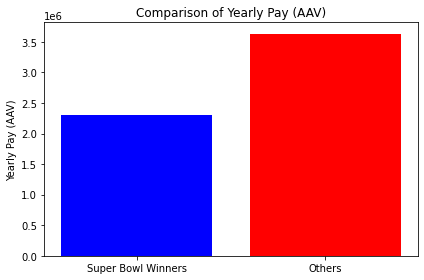

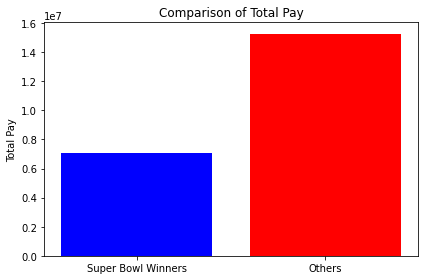

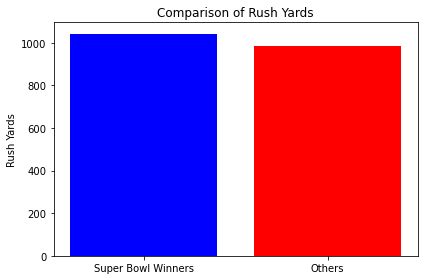

In [8]:
import matplotlib.pyplot as plt

def create_bar_graph(metric_name, winner_value, other_value, title):
    categories = ['Super Bowl Winners', 'Others']
    values = [winner_value, other_value]
    colors = ['b', 'r']

    plt.bar(categories, values, color=colors)
    plt.ylabel(metric_name)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Bar graph for Yearly Pay (AAV)
create_bar_graph('Yearly Pay (AAV)', average_aav_winners_filtered, average_aav_others_filtered, 'Comparison of Yearly Pay (AAV)')

# Bar graph for Total Pay
create_bar_graph('Total Pay', average_total_pay_winners_filtered, average_total_pay_others_filtered, 'Comparison of Total Pay')

# Bar graph for Rush Yards
create_bar_graph('Rush Yards', average_rush_yards_winners_filtered, average_rush_yards_others_filtered, 'Comparison of Rush Yards')

In [9]:
matching_indices = [i for i, (season, game) in enumerate(zip(superbowlWinningTeamSeasonLeadRushers, superbowlWinningTeamGameLeadRushers)) if season == game]

number_of_matches = len(matching_indices)
number_of_seasons = len(superbowlWinningTeamSeasonLeadRushers)

print(f"Number of matching names at the same index: {number_of_matches}/{number_of_seasons}")
print(f"Indices where names match: {matching_indices}")

Number of matching names at the same index: 9/17
Indices where names match: [2, 3, 5, 6, 10, 11, 12, 13, 16]


In [10]:
#lead rusher for the season and super bowl
year_player_season_and_game_array = [year_player_season_array[i] for i in matching_indices]
print(year_player_season_and_game_array)

[(2008, 'Willie Parker'), (2009, 'Pierre Thomas'), (2011, 'Ahmad Bradshaw'), (2012, 'Ray Rice'), (2016, 'LeGarrette Blount'), (2017, 'LeGarrette Blount'), (2018, 'Sony Michel'), (2019, 'Damien Williams'), (2022, 'Isiah Pacheco')]


In [11]:
# Filter the dataframe to include only the Super Bowl-winning running backs from their respective winning years
winners_filtered = df[df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_and_game_array)]

# Filter the dataframe to exclude the Super Bowl-winning running backs from their respective winning years
others_filtered = df[~df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_and_game_array)]

# AAV
average_aav_winners_filtered = winners_filtered['Yearly Pay (AAV)'].mean()
average_aav_others_filtered = others_filtered['Yearly Pay (AAV)'].mean()

# Total Pay
average_total_pay_winners_filtered = winners_filtered['Total Pay'].mean()
average_total_pay_others_filtered = others_filtered['Total Pay'].mean()

# Rush Yards
average_rush_yards_winners_filtered = winners_filtered['Rush Yards'].mean()
average_rush_yards_others_filtered = others_filtered['Rush Yards'].mean()

print(f"Average AAV for filtered Super Bowl-winning RBs: ${average_aav_winners_filtered:,.2f}")
print(f"Average AAV for other RBs (filtered): ${average_aav_others_filtered:,.2f}")
print(f"Average Total Pay for filtered Super Bowl-winning RBs: ${average_total_pay_winners_filtered:,.2f}")
print(f"Average Total Pay for other RBs (filtered): ${average_total_pay_others_filtered:,.2f}")
print(f"Average Rush Yards for filtered Super Bowl-winning RBs: {average_rush_yards_winners_filtered:.2f}")
print(f"Average Rush Yards for other RBs (filtered): {average_rush_yards_others_filtered:.2f}")

Average AAV for filtered Super Bowl-winning RBs: $2,589,348.01
Average AAV for other RBs (filtered): $3,611,436.84
Average Total Pay for filtered Super Bowl-winning RBs: $5,941,975.38
Average Total Pay for other RBs (filtered): $15,178,887.81
Average Rush Yards for filtered Super Bowl-winning RBs: 1059.00
Average Rush Yards for other RBs (filtered): 985.06


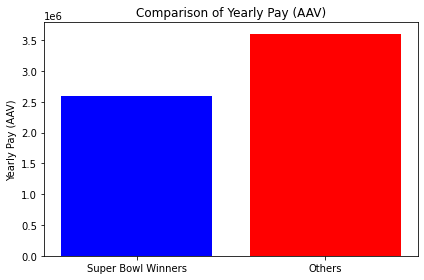

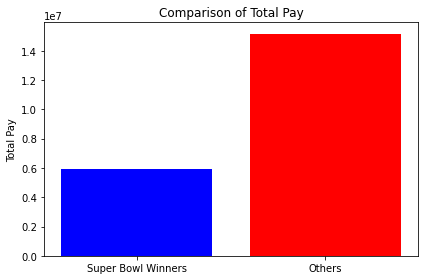

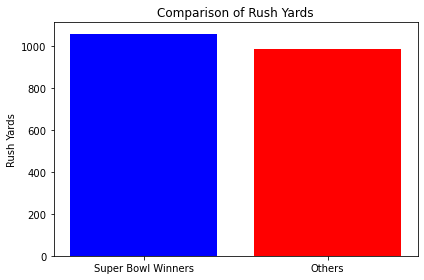

In [12]:
# Bar graph for Yearly Pay (AAV)
create_bar_graph('Yearly Pay (AAV)', average_aav_winners_filtered, average_aav_others_filtered, 'Comparison of Yearly Pay (AAV)')

# Bar graph for Total Pay
create_bar_graph('Total Pay', average_total_pay_winners_filtered, average_total_pay_others_filtered, 'Comparison of Total Pay')

# Bar graph for Rush Yards
create_bar_graph('Rush Yards', average_rush_yards_winners_filtered, average_rush_yards_others_filtered, 'Comparison of Rush Yards')

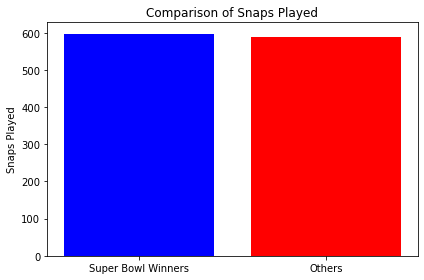

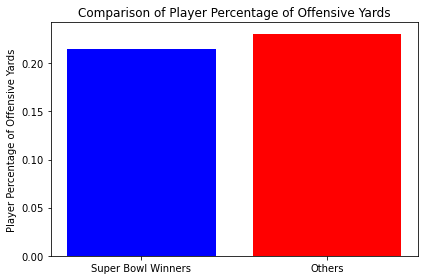

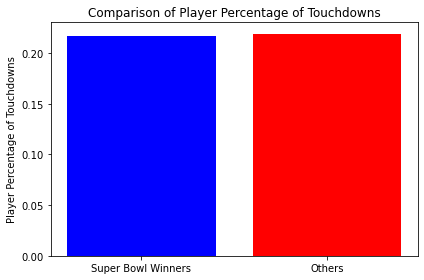

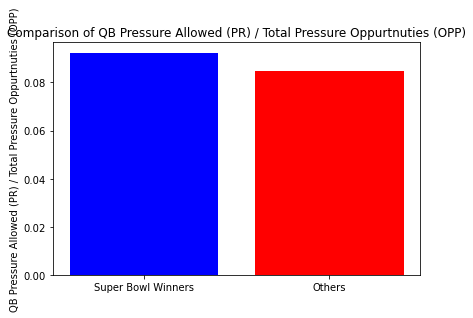

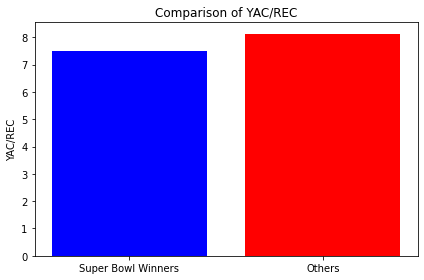

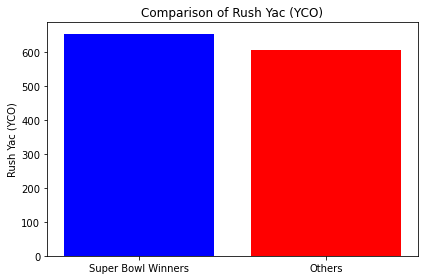

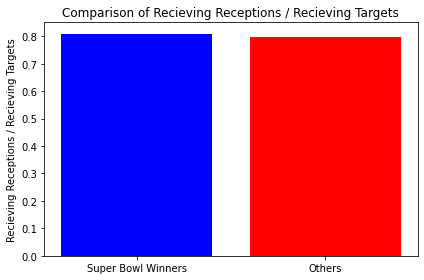

In [15]:
#superbowl winning team lead rushers

import matplotlib.pyplot as plt

# Filter data
winners_data = df[df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_array)]
others_data = df[~df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_array)]

# Compute averages
metrics = ['Snaps Played', 'Player Percentage of Offensive Yards', 'Player Percentage of Touchdowns', 'QB Pressure Allowed (PR) / Total Pressure Oppurtnuties (OPP)', 'YAC/REC', 'Rush Yac (YCO)', 'Recieving Receptions / Recieving Targets']
winners_values = [
    winners_data['Snaps Played'].mean(),
    winners_data['Player Percentage of Offensive Yards'].mean(),
    winners_data['Player Percentage of Touchdowns'].mean(),
    (winners_data['QB Pressure Allowed (PR)'] / winners_data['Total Pressure Oppurtnuties (OPP)']).mean(),
    winners_data['YAC/REC'].mean(),
    winners_data['Rush Yac (YCO)'].mean(),
    (winners_data['Recieving Receptions'] / winners_data['Recieving Targets']).mean()
]
others_values = [
    others_data['Snaps Played'].mean(),
    others_data['Player Percentage of Offensive Yards'].mean(),
    others_data['Player Percentage of Touchdowns'].mean(),
    (others_data['QB Pressure Allowed (PR)'] / others_data['Total Pressure Oppurtnuties (OPP)']).mean(),
    others_data['YAC/REC'].mean(),
    others_data['Rush Yac (YCO)'].mean(),
    (others_data['Recieving Receptions'] / others_data['Recieving Targets']).mean()
]

# Visualization
for metric, winner_value, other_value in zip(metrics, winners_values, others_values):
    categories = ['Super Bowl Winners', 'Others']
    values = [winner_value, other_value]
    colors = ['b', 'r']
    
    plt.bar(categories, values, color=colors)
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric}')
    plt.tight_layout()
    plt.show()

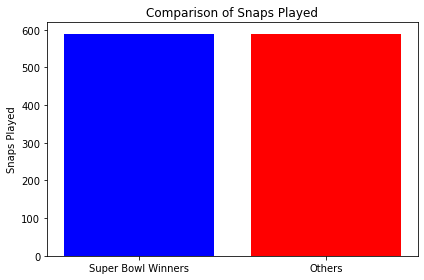

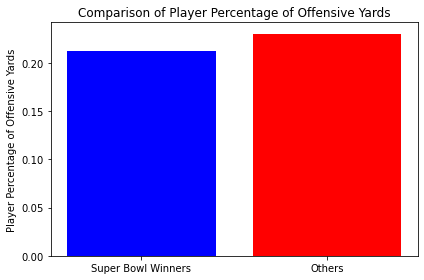

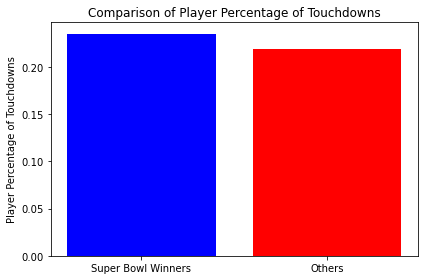

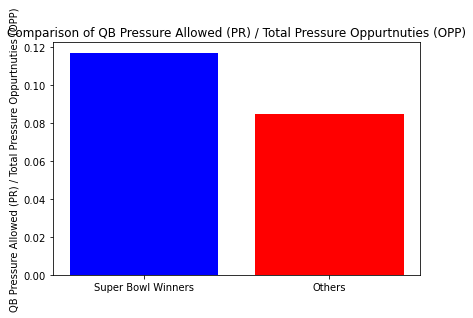

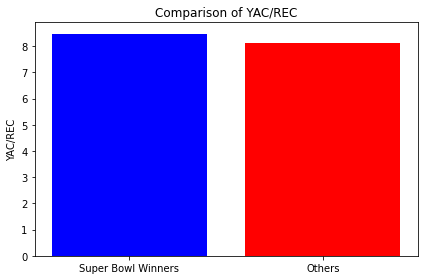

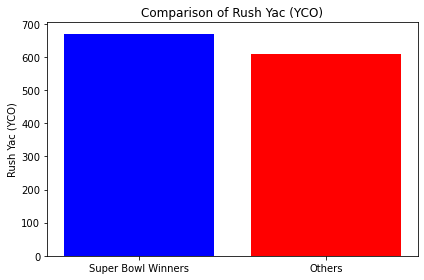

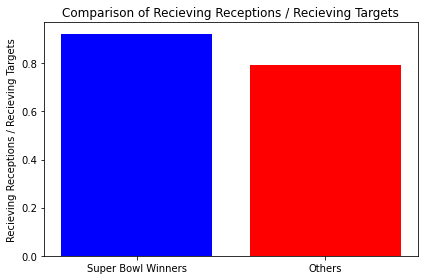

In [16]:
#superbowl winning team lead rushers that also were superbowl game lead rushers

import matplotlib.pyplot as plt

# Filter data
winners_data = df[df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_and_game_array)]
others_data = df[~df[['Year', 'Player Name']].apply(tuple, axis=1).isin(year_player_season_and_game_array)]

# Compute averages
metrics = ['Snaps Played', 'Player Percentage of Offensive Yards', 'Player Percentage of Touchdowns', 'QB Pressure Allowed (PR) / Total Pressure Oppurtnuties (OPP)', 'YAC/REC', 'Rush Yac (YCO)', 'Recieving Receptions / Recieving Targets']
winners_values = [
    winners_data['Snaps Played'].mean(),
    winners_data['Player Percentage of Offensive Yards'].mean(),
    winners_data['Player Percentage of Touchdowns'].mean(),
    (winners_data['QB Pressure Allowed (PR)'] / winners_data['Total Pressure Oppurtnuties (OPP)']).mean(),
    winners_data['YAC/REC'].mean(),
    winners_data['Rush Yac (YCO)'].mean(),
    (winners_data['Recieving Receptions'] / winners_data['Recieving Targets']).mean()
]
others_values = [
    others_data['Snaps Played'].mean(),
    others_data['Player Percentage of Offensive Yards'].mean(),
    others_data['Player Percentage of Touchdowns'].mean(),
    (others_data['QB Pressure Allowed (PR)'] / others_data['Total Pressure Oppurtnuties (OPP)']).mean(),
    others_data['YAC/REC'].mean(),
    others_data['Rush Yac (YCO)'].mean(),
    (others_data['Recieving Receptions'] / others_data['Recieving Targets']).mean()
]

# Visualization
for metric, winner_value, other_value in zip(metrics, winners_values, others_values):
    categories = ['Super Bowl Winners', 'Others']
    values = [winner_value, other_value]
    colors = ['b', 'r']
    
    plt.bar(categories, values, color=colors)
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric}')
    plt.tight_layout()
    plt.show()